<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/math/Continuous_Random_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연속 확률 변수

## 1. 1차원 연속형 확률변수 정의

### 이산형 확률변수 VS 연속형 확률변수
- 취할 수 있는 값이 셀 수 있는지(이산) 여부에 따른 차이
- 연속형의 경우, 평균 및 분산 등의 통계지표 계산과정에 적분이 사용되는 등 계산이 더욱 복잡하다


### Python 초기 Setting
- 적분은 Scipy의 `Integral` 모듈을 이용하여 계산

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

### 연속형 확률변수
- 취할 수 있는 값이 연속인 확률변수(셀 수 없음)
- 확률변수의 각 값이 나올 수 있는 확률은 0이며,  
각 값들이 어떤 범위안에 속할 확률로서 확률값이 정의된다
- 예시   
  - 둘레가 1인 룰렛을 돌린 후 룰렛의 변화된 호의 길이
  - 각 값이 나올 확률은 동일하다고 가정 (But, 실제확률은 0임) 
  1. 취할 수 있는 값은? 
    - 0~1사이의실수
  2. 0.5라는 값을 취할 확률은? 
    - 1 or 0  
    ( * 정확하게 0.50000000을 취할 확률은 1이 아니라, 0임 )
    
![스크린샷 2023-01-06 오후 11 36 08](https://user-images.githubusercontent.com/96982072/211033439-d2186226-7f01-4540-b50d-4a60c96115c3.png)


### 확률밀도함수 ( PDF : Probability Density Function )
- 연속형 확률변수의 확률 정의에 사용되는 함수
- [𝑎,𝑏] : 확률변수가 취할 수 있는 값의 표현
- 𝑓(𝑥) : 확률밀도함수
  - 연속형 확률변수는 $𝑓(𝑥) = 𝑃(𝑋=𝑥)$ 이렇게 표현되지 않는다  
  - 밀도함수에 의한 확률은 확률변수 𝑋 가 $ 𝑥_0 ≤ 𝑋 ≤ 𝑥_1 $의 구간에 들어갈 확률로서, $ P(𝑥_0 ≤ 𝑋 ≤ 𝑥_1) $로 정의되고 아래 적분식으로 계산한다
  $$ P(𝑥_0 ≤ 𝑋 ≤ 𝑥_1) = \int_{x_0}^{x_1} 𝑓(𝑥)dx$$

### 연속형 확률변수 예시
- 불공정한 룰렛
  - 둘레가 1인 룰렛을 돌린 후 룰렛의 변화된 호의 길이
  - 각 값이 나올 확률밀도함수는 점점 커진다고 가정 (But,실제 확률은 0임)
  $$ 𝑓(𝑥) = \begin{cases}
2x & (0 ≤ x ≤ 1) \\
0 & (otherwise)
\end{cases}$$

### [Python] 연속형 확률변수 정의

In [3]:
x_range = np.array([0, 1])

In [4]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [5]:
X = [x_range, f]

### [Python] 연속형 확률변수 시각화 (𝟎.𝟒 ≤ 𝒙 ≤ 𝟎.𝟔)

 $$ 𝑓(𝑥) = \begin{cases}
2x & (0 ≤ x ≤ 1) \\
0 & (otherwise)
\end{cases}$$

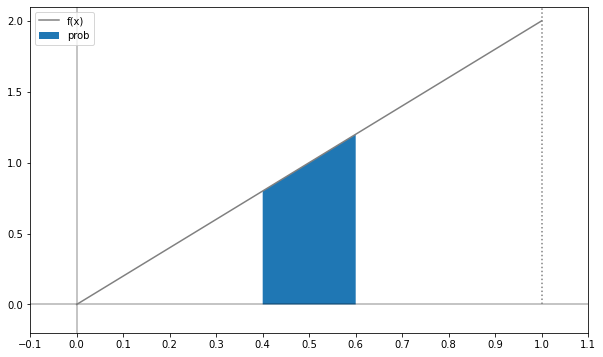

In [6]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

### [Python] 연속형 확률변수 영역 면적 계산 (𝟎.𝟒 ≤ 𝒙 ≤ 𝟎.𝟔)
 
 $$ 𝑓(𝑥) = \begin{cases}
2x & (0 ≤ x ≤ 1) \\
0 & (otherwise)
\end{cases}$$

$$ P(0.4 ≤ x ≤ 0.6) = \int_{0.4}^{0.6} 𝑓(𝑥)dx $$

In [7]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

### [Python] 연속형 확률변수 확률의 성질

$$ f(x) \ge 0 \\ \int_{-∞}^{∞} f(x)dx = 1$$

### [Python] 연속형 확률변수 확률의 성질 확인 방법

- `scipy.optimizer`의 `minimize_scalar` 함수  ( 함수의 최소값을 구하는 함수 )를 활용
  - $𝑓(𝑥)$ 의 최소값이 0이상으로 나오면 항상 0이상의 값을 취하는지 확인이 가능하다

- 예시
  $$ 𝑓(𝑥) = \begin{cases}
2x & (0 ≤ x ≤ 1) \\
0 & (otherwise)
\end{cases}$$


In [8]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [9]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

### 누적분포함수 ( CDF : Cumulative Distribution Function ) 
- 확률변수 𝑋가 𝑥이하가 될 때의 확률
- 𝐹(𝑥) : 누적분포함수
  - 아래와 같이 정의된다
  $$ F(x) = P(𝑋 ≤ 𝑥) = \int_{-∞}^{x_1} 𝑓(𝑥) 𝑑𝑥 $$


### [Python] 누적분포함수 정의 및 확률 계산

$$ 𝑓(𝑥) = \begin{cases}
2x & (0 ≤ x ≤ 1) \\
0 & (otherwise)
\end{cases}$$

- $P(0.4 ≤ 𝑥 ≤ 0.6) = 𝐹(0.6) − 𝐹(0.4)$를 활용한 계산 또한 가능하다

In [10]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [11]:
F(0.6) - F(0.4)

0.200

### [Python] 누적분포함수 시각화
- 누적분포함수는 반드시 단조 증가함수의 특성을 가진다

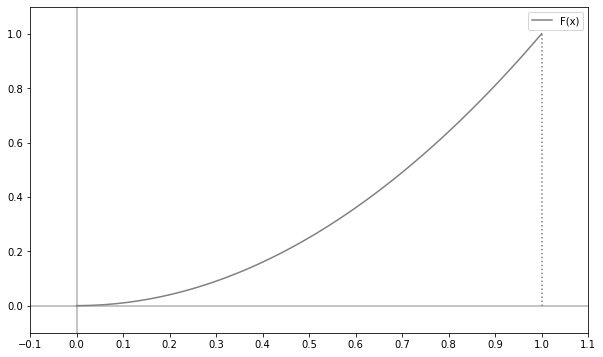

In [12]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 확률변수의 선형 변환 ( 𝒀 = 𝟐𝑿 + 𝟑 )
- 값에 2를 곱하고 3을 더한 2𝑋+ 을 𝑌라고 하면,𝑌 또한 연속형 확률변수가 된다
  - 𝑌의 확률밀도함수 𝑔(𝑦) 정의
  $$ g(y) = \begin{cases}
{(y-3) \over 2} & (3 ≤ y ≤ 5) \\
0 & (otherwise)
\end{cases}$$
  - 𝑌의 누적분포함수 𝐺(𝑦) 정의
  $$ G(y) = P(Y ≤ y) = \int_{-∞}^{y} g(y) 𝑑y $$



### [Python] 확률변수 𝒀 = 𝟐𝑿 + 𝟑 정의 및 시각화

In [13]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

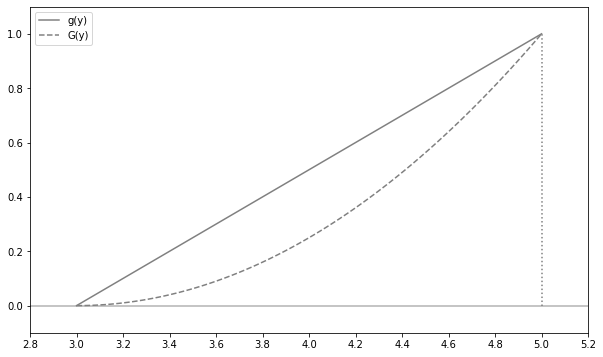

In [14]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()